<!--NAVIGATION-->
< [A Quick Tour of Python Language Syntax](02-Basic-Python-Syntax.ipynb) | [Contents](0-Index.ipynb) | [Basic Python Semantics: Operators](04-Semantics-Operators.ipynb) >

# Basic Python Semantics: Variables and Objects

This section will begin to cover the basic semantics of the Python language 3.6 and above. As opposed to the *syntax* covered in the previous section, the *semantics* of a language involve the meaning of the statements. As with our discussion of syntax, here we'll preview a few of the essential semantic constructions in Python to give you a better frame of reference for understanding the code in the following sections.

This section will cover the semantics of *variables* and *objects*, which are the main ways you store, reference, and operate on data within a Python script.

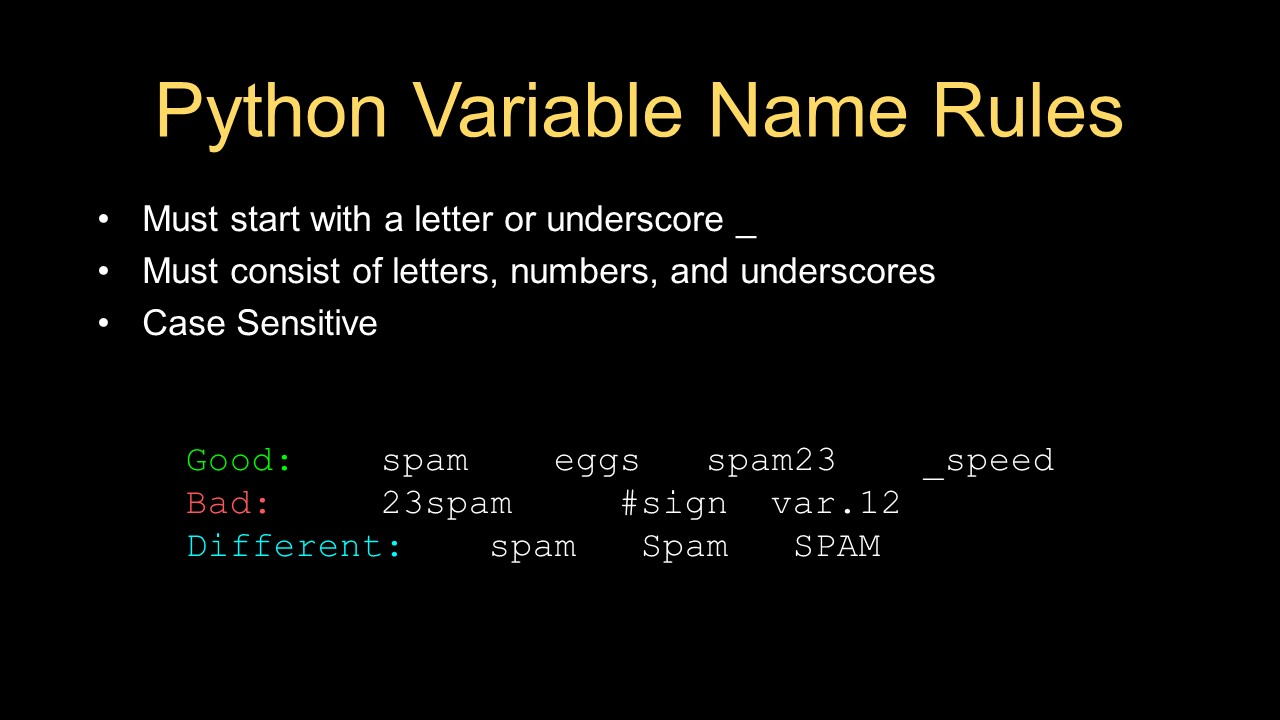

## Python Variables Are Pointers

Assigning variables in Python is as easy as putting a variable name to the left of the equals (``=``) sign:

```python
# assign 4 to the variable x
x = 4
```

This may seem straightforward, but if you have the wrong mental model of what this operation does, the way Python works may seem confusing.
We'll briefly dig into that here.

In many programming languages, variables are best thought of as containers or buckets into which you put data.
So in C, for example, when you write

```C
// C code
int x = 4;
```

you are essentially defining a "memory bucket" named ``x``, and putting the value ``4`` into it.
In Python, by contrast, variables are best thought of not as containers but as pointers.
So in Python, when you write

```python
x = 4
```

you are essentially defining a *pointer* named ``x`` that points to some other bucket containing the value ``4``.
Note one consequence of this: because Python variables just point to various objects, there is no need to "declare" the variable, or even require the variable to always point to information of the same type!
This is the sense in which people say Python is *dynamically-typed*: variable names can point to objects of any type.
So in Python, you can do things like this:

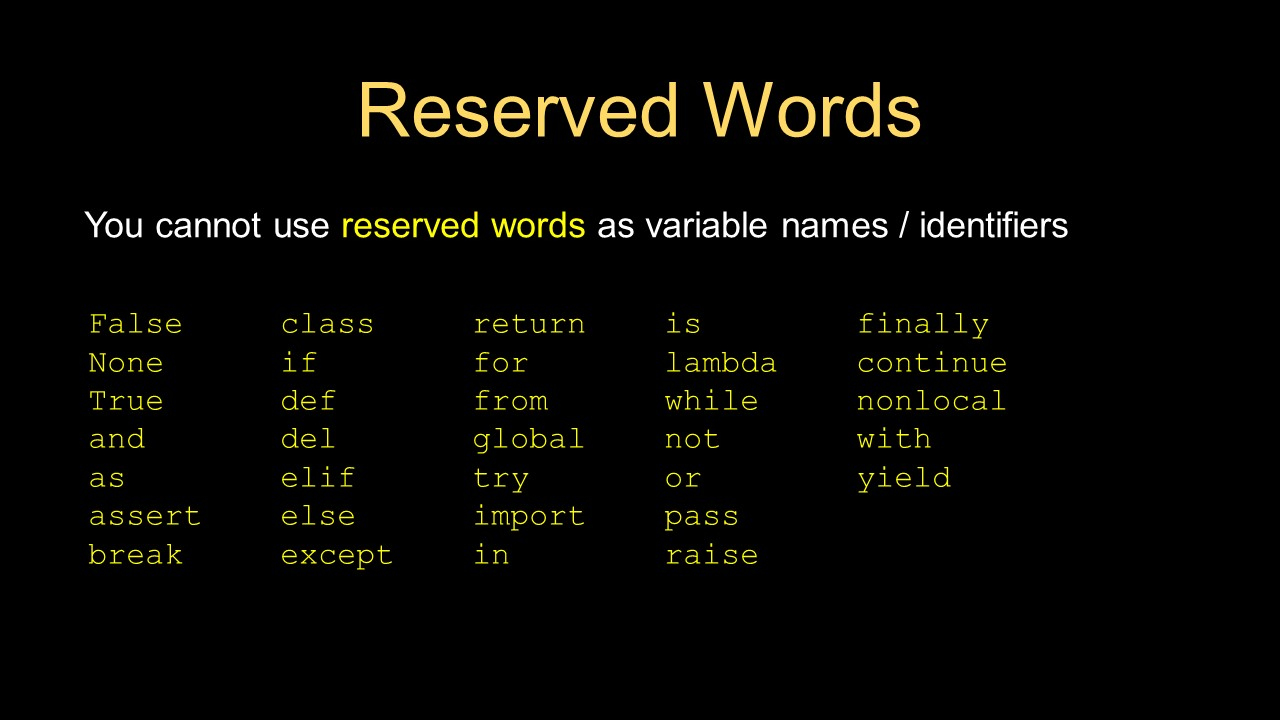

In [1]:
x = 1         # x is an integer
x = 'hello'   # now x is a string
x = [1, 2, 3] # now x is a list
x = 1.1       # now x is a float or real number

While users of statically-typed languages might miss the type-safety that comes with declarations like those found in C,

```C
int x = 4;
```

this dynamic typing is one of the pieces that makes Python so quick to write and easy to read.

There is a consequence of this "variable as pointer" approach that you need to be aware of.
If we have two variable names pointing to the same *mutable* object, then changing one will change the other as well!
For example, let's create and modify a list:

In [4]:
x = [1, 2, 3]
y = x

We've created two variables ``x`` and ``y`` which both point to the same object.
Because of this, if we modify the list via one of its names, we'll see that the "other" list will be modified as well:

In [3]:
print(y)

[1, 2, 3]


In [4]:
x.append(4) # append 4 to the list pointed to by x
print(y) # y's list is modified as well!

[1, 2, 3, 4]


This behavior might seem confusing if you're wrongly thinking of variables as buckets that contain data.
But if you're correctly thinking of variables as pointers to objects, then this behavior makes sense.

Note also that if we use "``=``" to assign another value to ``x``, this will not affect the value of ``y`` – assignment is simply a change of what object the variable points to:

In [5]:
x = 'something else'
print(y)  # y is unchanged

[1, 2, 3, 4]


Again, this makes perfect sense if you think of ``x`` and ``y`` as pointers, and the "``=``" operator as an operation that changes what the name points to.

You might wonder whether this pointer idea makes arithmetic operations in Python difficult to track, but Python is set up so that this is not an issue. Numbers, strings, and other *simple types* are immutable: you can't change their value – you can only change what values the variables point to.
So, for example, it's perfectly safe to do operations like the following:

In [6]:
x = 10
y = x
x += 5  # add 5 to x's value, and assign it to x
print("x =", x)
print("y =", y)

x = 15
y = 10


When we call ``x += 5``, we are not modifying the value of the ``10`` object pointed to by ``x``; we are rather changing the variable ``x`` so that it points to a new integer object with value ``15``.
For this reason, the value of ``y`` is not affected by the operation.

## Everything Is an Object

Python is an object-oriented programming language, and in Python everything is an object.

Let's flesh-out what this means. Earlier we saw that variables are simply pointers, and the variable names themselves have no attached type information.
This leads some to claim erroneously that Python is a type-free language. But this is not the case!
Consider the following:

In [7]:
x = 4
type(x)

int

In [8]:
x = 'hello'
type(x)

str

In [9]:
x = 3.14159
type(x)

float

Python has types; however, the types are linked not to the variable names but *to the objects themselves*.

In object-oriented programming languages like Python, an *object* is an entity that contains data along with associated metadata and/or functionality.
In Python everything is an object, which means every entity has some metadata (called *attributes*) and associated functionality (called *methods*).
These attributes and methods are accessed via the dot syntax.

For example, before we saw that lists have an ``append`` method, which adds an item to the list, and is accessed via the dot ("``.``") syntax:

In [10]:
L = [1, 2, 3]
L.append(100)
print(L)

[1, 2, 3, 100]


While it might be expected for compound objects like lists to have attributes and methods, what is sometimes unexpected is that in Python even simple types have attached attributes and methods.
For example, numerical types have a ``real`` and ``imag`` attribute that returns the real and imaginary part of the value, if viewed as a complex number:

In [11]:
x = 4.5
print(x.real, "+", x.imag, 'i')

4.5 + 0.0 i


Methods are like attributes, except they are functions that you can call using opening and closing parentheses.
For example, floating point numbers have a method called ``is_integer`` that checks whether the value is an integer:

In [12]:
x = 4.5
x.is_integer()

False

In [13]:
x = 4.0
x.is_integer()

True

When we say that everything in Python is an object, we really mean that *everything* is an object – even the attributes and methods of objects are themselves objects with their own ``type`` information:

In [14]:
type(x.is_integer)

builtin_function_or_method

We'll find that the everything-is-object design choice of Python allows for some very convenient language constructs.

<!--NAVIGATION-->
< [A Quick Tour of Python Language Syntax](02-Basic-Python-Syntax.ipynb) | [Contents](0-Index.ipynb) | [Basic Python Semantics: Operators](04-Semantics-Operators.ipynb) >